# Example surrogate neural traces from different models in response to natural song

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import plot_b, set_plot

FPS = 30.03
DT = 1/FPS

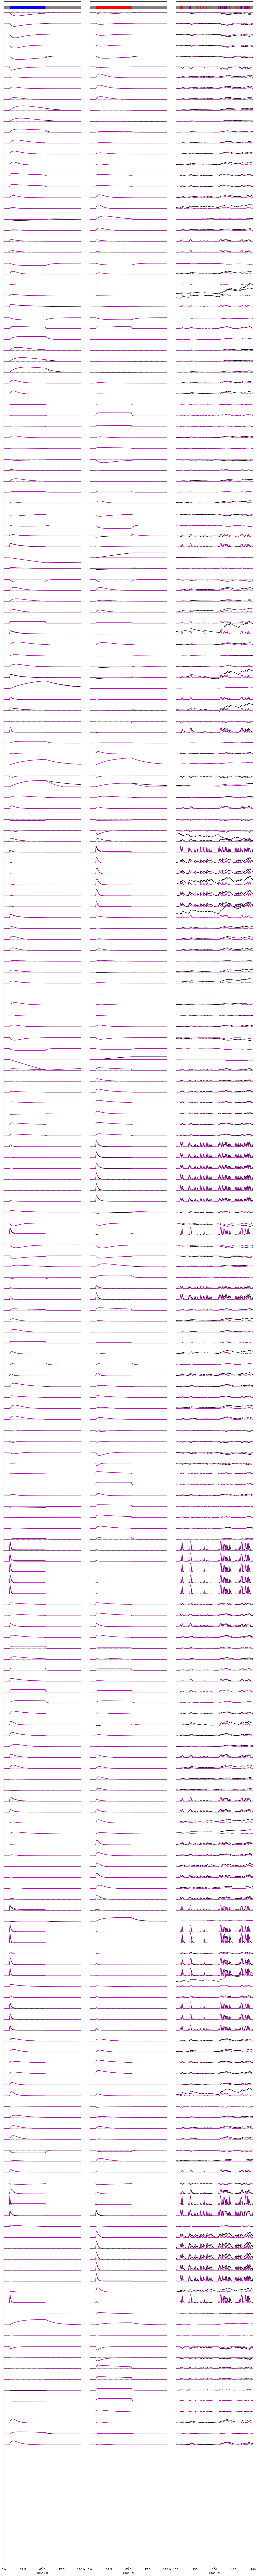

In [18]:
ITR = 25
T_START = 120
T_STOP = 180

# MDLS = ['ma', 'linma']
MDLS = ['ma', 'lnma']
COLORS = ['k', 'm']

NRNS = range(224)

fig, axs = plt.subplots(1, 3, figsize=(18, .8*len(NRNS)), tight_layout=True)

for mdl, color in zip(MDLS, COLORS):
    for ax, itr, t_start, t_stop in zip(axs, [998, 999, ITR], (0, 0, T_START), (130, 130, T_STOP)):
        fname = f'data/simple/mlv/neur_basic/baker_{mdl}/mlv_baker_{mdl}_tr_{itr}.npy'
        df_xpl = np.load(fname, allow_pickle=True)[0]['df']

        for cnrn, nrn in enumerate(NRNS):
            ax.plot(df_xpl['T'], df_xpl[f'R_{nrn}'] - 10*cnrn, c=color, lw=2)
            ax.axhline(-10*cnrn, color='gray', ls='--', lw=.8)

        t = np.arange(len(df_xpl))*DT
        s = np.zeros(len(t))
        s[df_xpl.S == 1] = 1
        s[(df_xpl.P == 1) | (df_xpl.F == 1)] = 2

        b = s[(t_start <= t) & (t < t_stop)]
        plot_b(ax, t[(t_start <= t) & (t < t_stop)], b, extent=[t_start, np.min([t_stop, t[-1]]), 3, 6], c=['gray', 'b', 'r'])

        ax.set_ylim(top=10)

        set_plot(ax, x_lim=(t_start, t_stop), x_ticks=np.linspace(t_start, t_stop, 5), y_ticks=[], x_label='Time (s)', font_size=14)